This notebook contain experimental code used in initial exploration.

In [1]:
import numpy as np
from matplotlib import pyplot as plt

# Spend distribution

In [2]:
p = 0.25
mu = 5
sigma_sq = 1
sigma = np.sqrt(sigma_sq)
N_SAMPLES = 100

In [3]:
samples = np.random.binomial(n=1, p=p, size=N_SAMPLES) * np.random.lognormal(mean=mu, sigma=sigma, size=N_SAMPLES)

In [4]:
means = []

for i in range(0, 10000):
    samples = np.random.binomial(n=1, p=p, size=N_SAMPLES) * np.random.lognormal(mean=mu, sigma=sigma, size=N_SAMPLES)
    means.append(samples.mean())

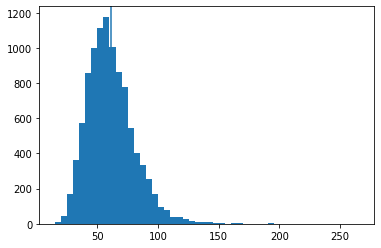

In [5]:
plt.hist(means, bins=50)
plt.axvline(p * np.exp(mu + sigma_sq / 2))
plt.show()

(0.0, 200.0)

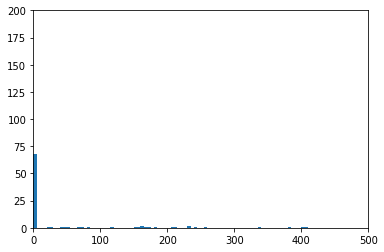

In [6]:
plt.hist(samples, bins=np.arange(0, 5000, 5))
plt.xlim(0, 500)
plt.ylim(0, 200)

In [7]:
from abc import ABC, abstractmethod

class Sampler(ABC):
    
    def __init__(self):
        pass
    
    @abstractmethod
    def theoretical_mean(self):
        pass
    
    @abstractmethod
    def theoretical_variance(self):
        pass
    
    @abstractmethod
    def get_samples(self):
        pass
    

class ConversionSampler(Sampler):
    def __init__(self, n: int, p: float):
        super().__init__()
        self.n = n
        self.p = p
        
    def theoretial_mean(self):
        return p
    
    def theoretical_variance(self):
        return p * (1 - p)
    
    def get_samples(self):
        return np.random.binomial(n=1, p=self.p, size=self.n)
    

class SpendSampler(Sampler):
    def __init__(self, n: int, p: float, mu: float, sigma_sq: float):
        super().__init__()
        self.n = n
        self.p = p
        self.mu = mu
        self.sigma_sq = sigma_sq
        
    def theoretical_mean(self):
        return self.p * np.exp(self.mu + self.sigma_sq / 2)
    
    def theoretical_variance(self):
        return(
            p * (np.exp(self.sigma_sq) - 1) * np.exp(2 * self.mu + self.sigma_sq) +
            (1-p) / p * self.theoretical_mean() ** 2)
    
    def get_samples(self):
        return(
            np.random.binomial(n=1, p=self.p, size=self.n) * 
            np.random.lognormal(mean=self.mu, sigma=np.sqrt(self.sigma_sq), size=self.n))

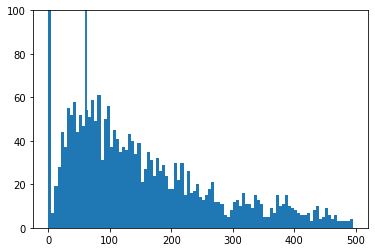

61.172983066055096 60.91348985399079


In [8]:
mySampler = SpendSampler(n=10000, p=0.25, mu=5, sigma_sq=1)
samples = mySampler.get_samples()

plt.hist(samples, bins=range(0, 500, 5))
plt.axvline(mySampler.theoretical_mean())
plt.axvline(samples.mean())
plt.ylim(0, 100)
plt.show()

print(mySampler.theoretical_mean(), samples.mean())

# Power vs effect size curve for one-tailed vs. two-tailed experiments

(0.0, 1.0)

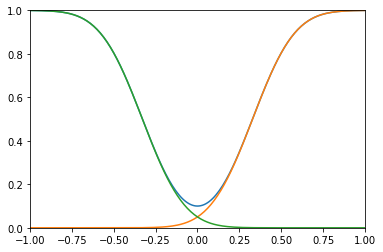

In [9]:
import numpy as np
from scipy.stats import norm

series = np.arange(-10, 10, 0.01)
sigma_D = 0.2
alpha = 0.1

plt.plot(series,
         1 - norm.cdf(norm.ppf(1 - alpha / 2) - series / sigma_D) + norm.cdf(norm.ppf(alpha / 2) - series / sigma_D))

plt.plot(series,
         1 - norm.cdf(norm.ppf(1 - alpha / 2) - series / sigma_D))

plt.plot(series,
         norm.cdf(norm.ppf(alpha / 2) - series / sigma_D))

# plt.plot(series, (1 - norm.cdf(norm.ppf(1 - alpha / 2) - series / sigma_D)) / 
#          (1 - norm.cdf(norm.ppf(1 - alpha / 2) - series / sigma_D) + norm.cdf(norm.ppf(alpha / 2) - series / sigma_D)))

# plt.plot(series, (1 - norm.cdf(norm.ppf(1 - alpha / 2) - np.abs(series) / sigma_D)))

plt.xlim(-1, 1)
plt.ylim(0, 1)
# plt.ylim(0, 3.25 * alpha)

In [10]:
scipy.stats.normal

NameError: name 'scipy' is not defined

In [ ]:
series

# Some 3D visualisation to get my head around

In [ ]:
# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(100, 1000, 0.25)
Y = np.arange(100, 1000, 0.25)
X, Y = np.meshgrid(X, Y)
Z = 2 * (1 + Y / X) ** 2

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel('n_1')
ax.set_ylabel('n_2')

# Customize the z axis.
ax.set_zlim(0, 200)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.arange(100, 1000, 0.25)
Y = np.arange(100, 1000, 0.25)
X, Y = np.meshgrid(X, Y)
Z = 2 * (1 + X / Y) ** 2

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel('n_1')
ax.set_ylabel('n_2')

# Customize the z axis.
ax.set_zlim(0, 200)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
n1 = np.arange(100, 1000, 0.25)
n2 = np.arange(100, 1000, 0.25)
n1, n2 = np.meshgrid(n1, n2)
Z = (2 * (1 + n2 / n1) ** 2 * n1 + 2 * (1 + n1 / n2) ** 2 * n2) / (n1 + n2)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

ax.set_xlabel('n_1')
ax.set_ylabel('n_2')

# Customize the z axis.
ax.set_zlim(0, 25)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# What are the realistic parameter samples for binary responses?

In [ ]:
r = 4

plt.plot(np.linspace(0, 1, 101), np.linspace(0, 1, 101) / r, c='g')
plt.plot(np.linspace(0, 1, 101), r * np.linspace(0, 1, 101), c='r')

plt.plot(np.linspace(0, 1, 101), 1 - r + r * np.linspace(0, 1, 101), c='g')
plt.plot(np.linspace(0, 1, 101), (r - 1 + np.linspace(0, 1, 101)) / r, c='r')

plt.plot(np.linspace(0, 1, 101), np.linspace(0, 1, 101), '--', c='black')

plt.xlim(0, 1)
plt.ylim(0, 1)